## Random Forest - Classification

### The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.


<img src="penguin.jpg" style="max-width:400px">

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,MALE
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,FEMALE
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,FEMALE
4,Adelie,Torgersen,36.700,19.300,193.000,3450.000,FEMALE
5,Adelie,Torgersen,39.300,20.600,190.000,3650.000,MALE


### Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.000,43.994,5.461,32.100,39.500,44.500,48.575,59.600
culmen_depth_mm,334.000,17.160,1.968,13.100,15.600,17.300,18.700,21.500
flipper_length_mm,334.000,201.015,14.022,172.000,190.000,197.000,213.000,231.000
body_mass_g,334.000,4209.057,804.836,2700.000,3550.000,4050.000,4793.750,6300.000


In [6]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(df[feature].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [7]:
df[df["sex"]== "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.500,15.700,217.000,4875.000,.


In [8]:
df[df.species =="Gentoo"].groupby("sex").describe().T

sex                            .   FEMALE     MALE
culmen_length_mm  count    1.000   58.000   61.000
                  mean    44.500   45.564   49.474
                  std        NaN    2.051    2.721
                  min     44.500   40.900   44.400
                  25%     44.500   43.850   48.100
                  50%     44.500   45.500   49.500
                  75%     44.500   46.875   50.500
                  max     44.500   50.500   59.600
culmen_depth_mm   count    1.000   58.000   61.000
                  mean    15.700   14.238   15.718
                  std        NaN    0.540    0.741
                  min     15.700   13.100   14.100
                  25%     15.700   13.800   15.200
                  50%     15.700   14.250   15.700
                  75%     15.700   14.600   16.100
                  max     15.700   15.500   17.300
flipper_length_mm count    1.000   58.000   61.000
                  mean   217.000  212.707  221.541
                  std        NaN    3.898    5.673
                  min    217.000  203.000  208.000
                  25%    217.000  210.000  218.000
                  50%    217.000  212.000  221.000
                  75%    217.000  215.000  225.000
                  max    217.000  222.000  231.000
body_mass_g       count    1.000   58.000   61.000
                  mean  4875.000 4679.741 5484.836
                  std        NaN  281.578  313.159
                  min   4875.000 3950.000 4750.000
                  25%   4875.000 4462.500 5300.000
                  50%   4875.000 4700.000 5500.000
                  75%   4875.000 4875.000 5700.000
                  max   4875.000 5200.000 6300.000

In [9]:
df.loc[336, "sex"] = "MALE"

In [10]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

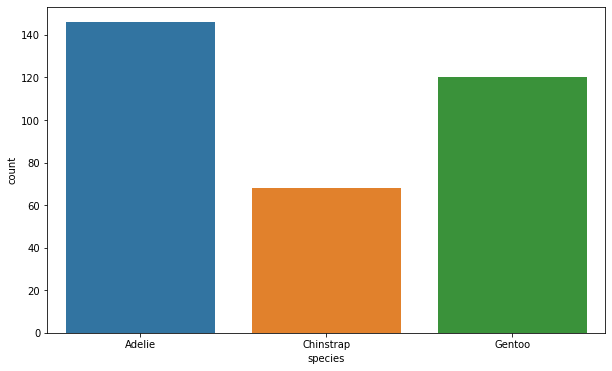

In [11]:
sns.countplot(x="species", data = df);

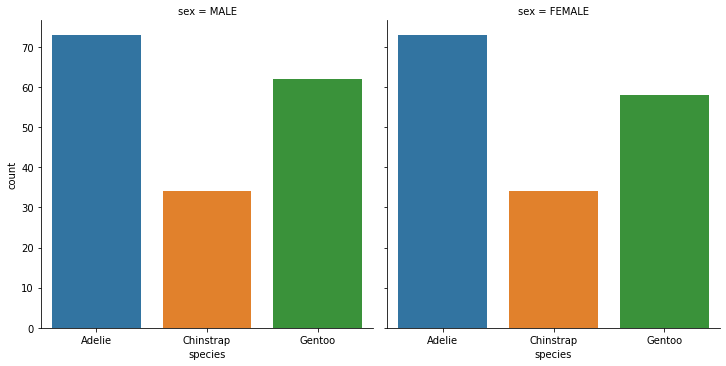

In [12]:
sns.catplot(x='species', data=df, kind='count',col='sex')

<Figure size 864x432 with 0 Axes>

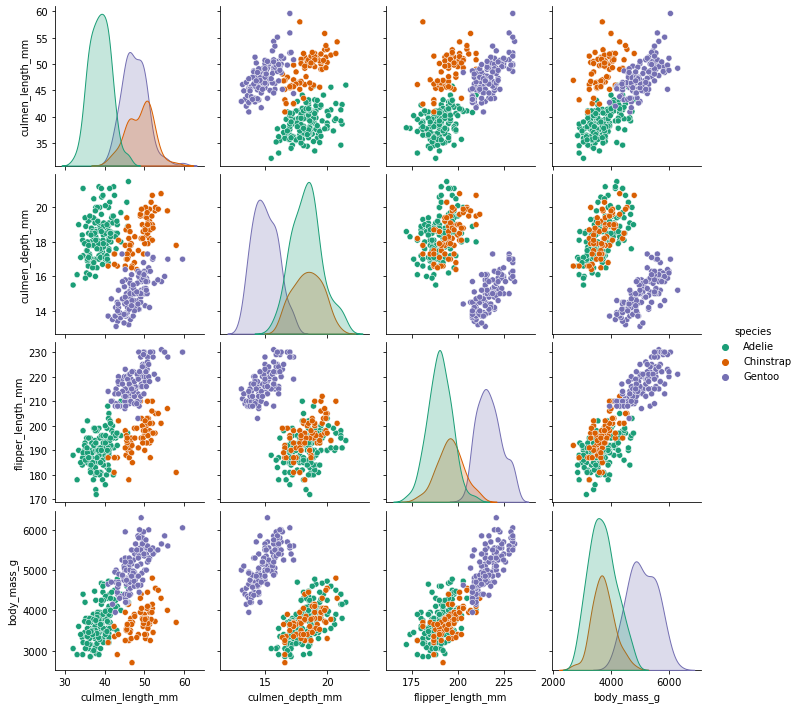

In [13]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')

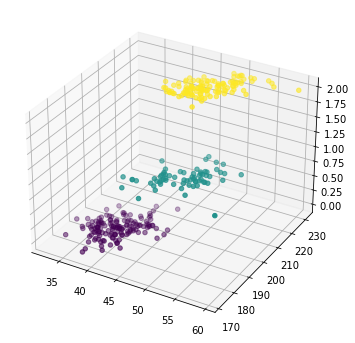

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
species = df["species"].map({'Adelie':0, 'Chinstrap':1, 'Gentoo':2})
ax.scatter(df['culmen_length_mm'], df['flipper_length_mm'], species, c = species );

### Train Test Split

In [15]:
X = df.drop('species',axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['species']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Modelling and Model Performance

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate

In [20]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  3  0]
 [ 3 25  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        44
   Chinstrap       0.89      0.89      0.89        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.95       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.95      0.95      0.95       111



### DT Model Feature Importance

In [21]:
dt_model.feature_importances_

array([0.34661893, 0.05503068, 0.54600085, 0.        , 0.041616  ,
       0.        , 0.01073354])

In [22]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

,Feature Importance
flipper_length_mm,0.546
culmen_length_mm,0.347
culmen_depth_mm,0.055
island_Dream,0.042
sex_MALE,0.011
body_mass_g,0.000
island_Torgersen,0.000


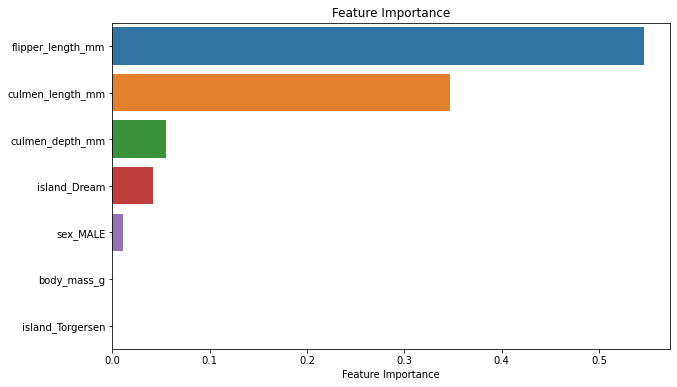

In [23]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  0  0]
 [ 1 27  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        44
   Chinstrap       1.00      0.96      0.98        28
      Gentoo       1.00      1.00      1.00        39

    accuracy                           0.99       111
   macro avg       0.99      0.99      0.99       111
weighted avg       0.99      0.99      0.99       111



### RF Model Feature Importance

In [26]:
rf_model.feature_importances_

array([0.35817279, 0.14781584, 0.24872361, 0.12368701, 0.09179355,
       0.02335269, 0.00645451])

In [27]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
culmen_length_mm,0.358
flipper_length_mm,0.249
culmen_depth_mm,0.148
body_mass_g,0.124
island_Dream,0.092
island_Torgersen,0.023
sex_MALE,0.006


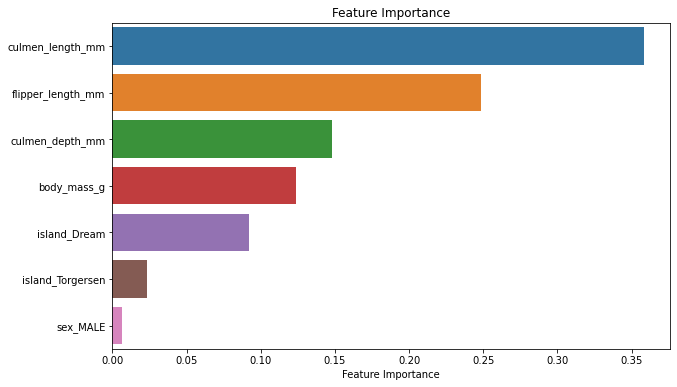

In [28]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

### Choosing correct number of trees

Let's explore if continually adding more trees improves performance...

In [29]:
from sklearn.metrics import accuracy_score

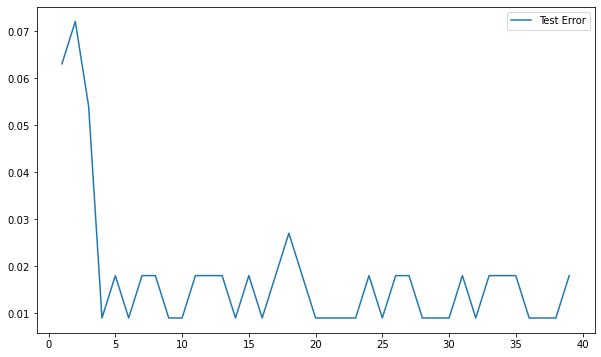

In [30]:
test_error = []
for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n, max_features='auto')
    model.fit(X_train, y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds, y_test))
plt.plot(range(1,40), test_error, label='Test Error')
plt.legend()

Clearly there are diminishing returns, on such a small dataset, we've pretty much extracted all the information we can after about 10 trees.

### HyperParameter Exploration

In [31]:
df = pd.read_csv("diabetes.csv")

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Train | Test Split and Scalling

In [34]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling and Model Performance

### Decision Tree

In [40]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[88 36]
 [20 48]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       124
           1       0.57      0.71      0.63        68

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



### Random Forest

#### With Default Parameters

In [42]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[108  16]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       124
           1       0.72      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.76      0.74      0.74       192
weighted avg       0.77      0.78      0.77       192



In [43]:
model = RandomForestClassifier(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.750
test_precision   0.683
test_recall      0.585
test_f1          0.620
dtype: float64

### RF Tunned

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'n_estimators':[50, 100, 300, 500],
             'max_features':[2, 4, 6, 8],
             'max_depth':[3, 5, 8],
             'min_samples_split':[2, 5, 8]} # Önem sırasına göre en önemli parametreler.

In [57]:
rf_model = RandomForestClassifier()
rf_grid_model = GridSearchCV(rf_model, param_grid, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [58]:
y_pred = rf_grid_model.predict(X_test)
rf_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  15]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



In [59]:
rf_grid_model.best_params_

{'max_depth': 5,
 'max_features': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_acc = accuracy_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  15]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.60      0.66        68

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



### KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV

In [63]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109  15]
 [ 28  40]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       124
           1       0.73      0.59      0.65        68

    accuracy                           0.78       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



### SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[110  14]
 [ 27  41]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       124
           1       0.75      0.60      0.67        68

    accuracy                           0.79       192
   macro avg       0.77      0.75      0.75       192
weighted avg       0.78      0.79      0.78       192



### Model Comparing

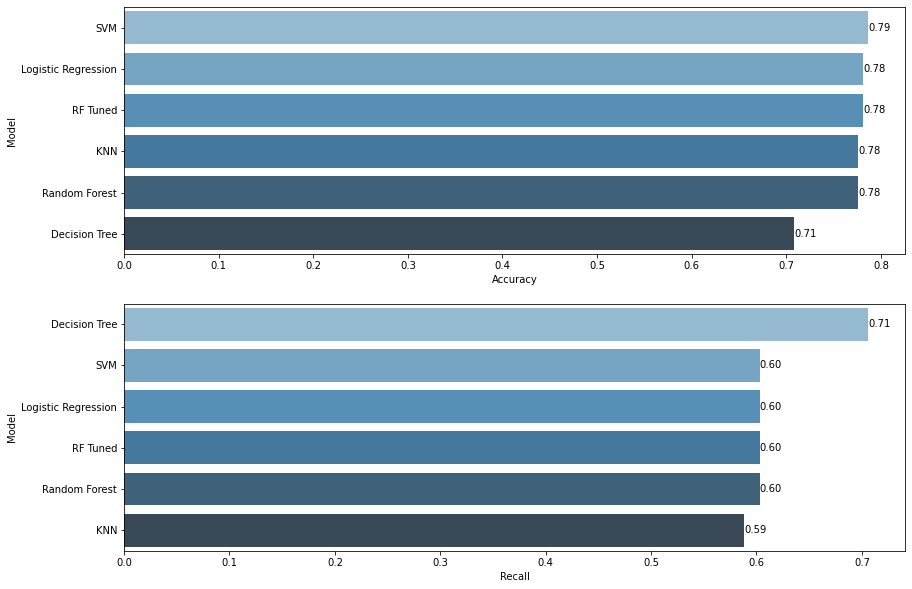

In [66]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "RF Tuned"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, dt_acc, rf_acc, rf_tuned_acc],
                        "Recall": [log_recall, knn_recall, svm_recall, dt_recall, rf_recall, rf_tuned_recall]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(212)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()